# **BPL Match Outcome Prediction**

### **Importing Libraries/Dependencies & Data**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [21]:
df = pd.read_csv('C:/Users/crypt/Downloads/BPL/PL/Dataset/premier_league_all_matches.csv')

### **Data Cleaning**

In [36]:
print(df.isna().sum())

Week          0
Date          0
Time          0
Home_Team     0
Home_xG       0
Score         0
Away_xG       0
Away_Team     0
Attendance    0
Venue         0
Referee       0
dtype: int64


In [37]:
# Removing duplicate values
df.drop_duplicates(inplace=True)
# Dropping rows with missing attendance values
df.dropna(subset=['Attendance'], inplace=True)
# Converting 'Date' and 'Time' to datetime objects
df['Date'] = pd.to_datetime(df["Date"])
df['Time'] = pd.to_datetime(df["Time"])

### **Exploratory Data Analysis (EDA)**

In [22]:
print(df.head())

   Week        Date   Time       Home_Team  Home_xG Score  Away_xG  \
0     1  2022-08-05  20:00  Crystal Palace      1.2   0–2      1.0   
1     1  2022-08-06  12:30          Fulham      1.2   2–2      1.2   
2     1  2022-08-06  15:00       Tottenham      1.5   4–1      0.5   
3     1  2022-08-06  15:00   Newcastle Utd      1.7   2–0      0.3   
4     1  2022-08-06  15:00    Leeds United      0.8   2–1      1.3   

         Away_Team  Attendance                      Venue         Referee  
0          Arsenal     25286.0              Selhurst Park  Anthony Taylor  
1        Liverpool     22207.0             Craven Cottage     Andy Madley  
2      Southampton     61732.0  Tottenham Hotspur Stadium  Andre Marriner  
3  Nott'ham Forest     52245.0             St James' Park    Simon Hooper  
4           Wolves     36347.0                Elland Road    Robert Jones  


In [23]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Week        1900 non-null   int64  
 1   Date        1900 non-null   object 
 2   Time        1900 non-null   object 
 3   Home_Team   1900 non-null   object 
 4   Home_xG     1900 non-null   float64
 5   Score       1900 non-null   object 
 6   Away_xG     1900 non-null   float64
 7   Away_Team   1900 non-null   object 
 8   Attendance  1459 non-null   float64
 9   Venue       1900 non-null   object 
 10  Referee     1900 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 163.4+ KB
None


In [24]:
print(df.describe())

              Week      Home_xG      Away_xG    Attendance
count  1900.000000  1900.000000  1900.000000   1459.000000
mean     19.500000     1.472895     1.235368  38573.172721
std      10.968743     0.830562     0.753487  16760.722552
min       1.000000     0.000000     0.000000   2000.000000
25%      10.000000     0.800000     0.700000  26771.000000
50%      19.500000     1.400000     1.100000  32458.000000
75%      29.000000     2.000000     1.700000  53174.000000
max      38.000000     5.900000     4.600000  81332.000000


### **Data Visualizations:**

**Visualizing Home Attendance**

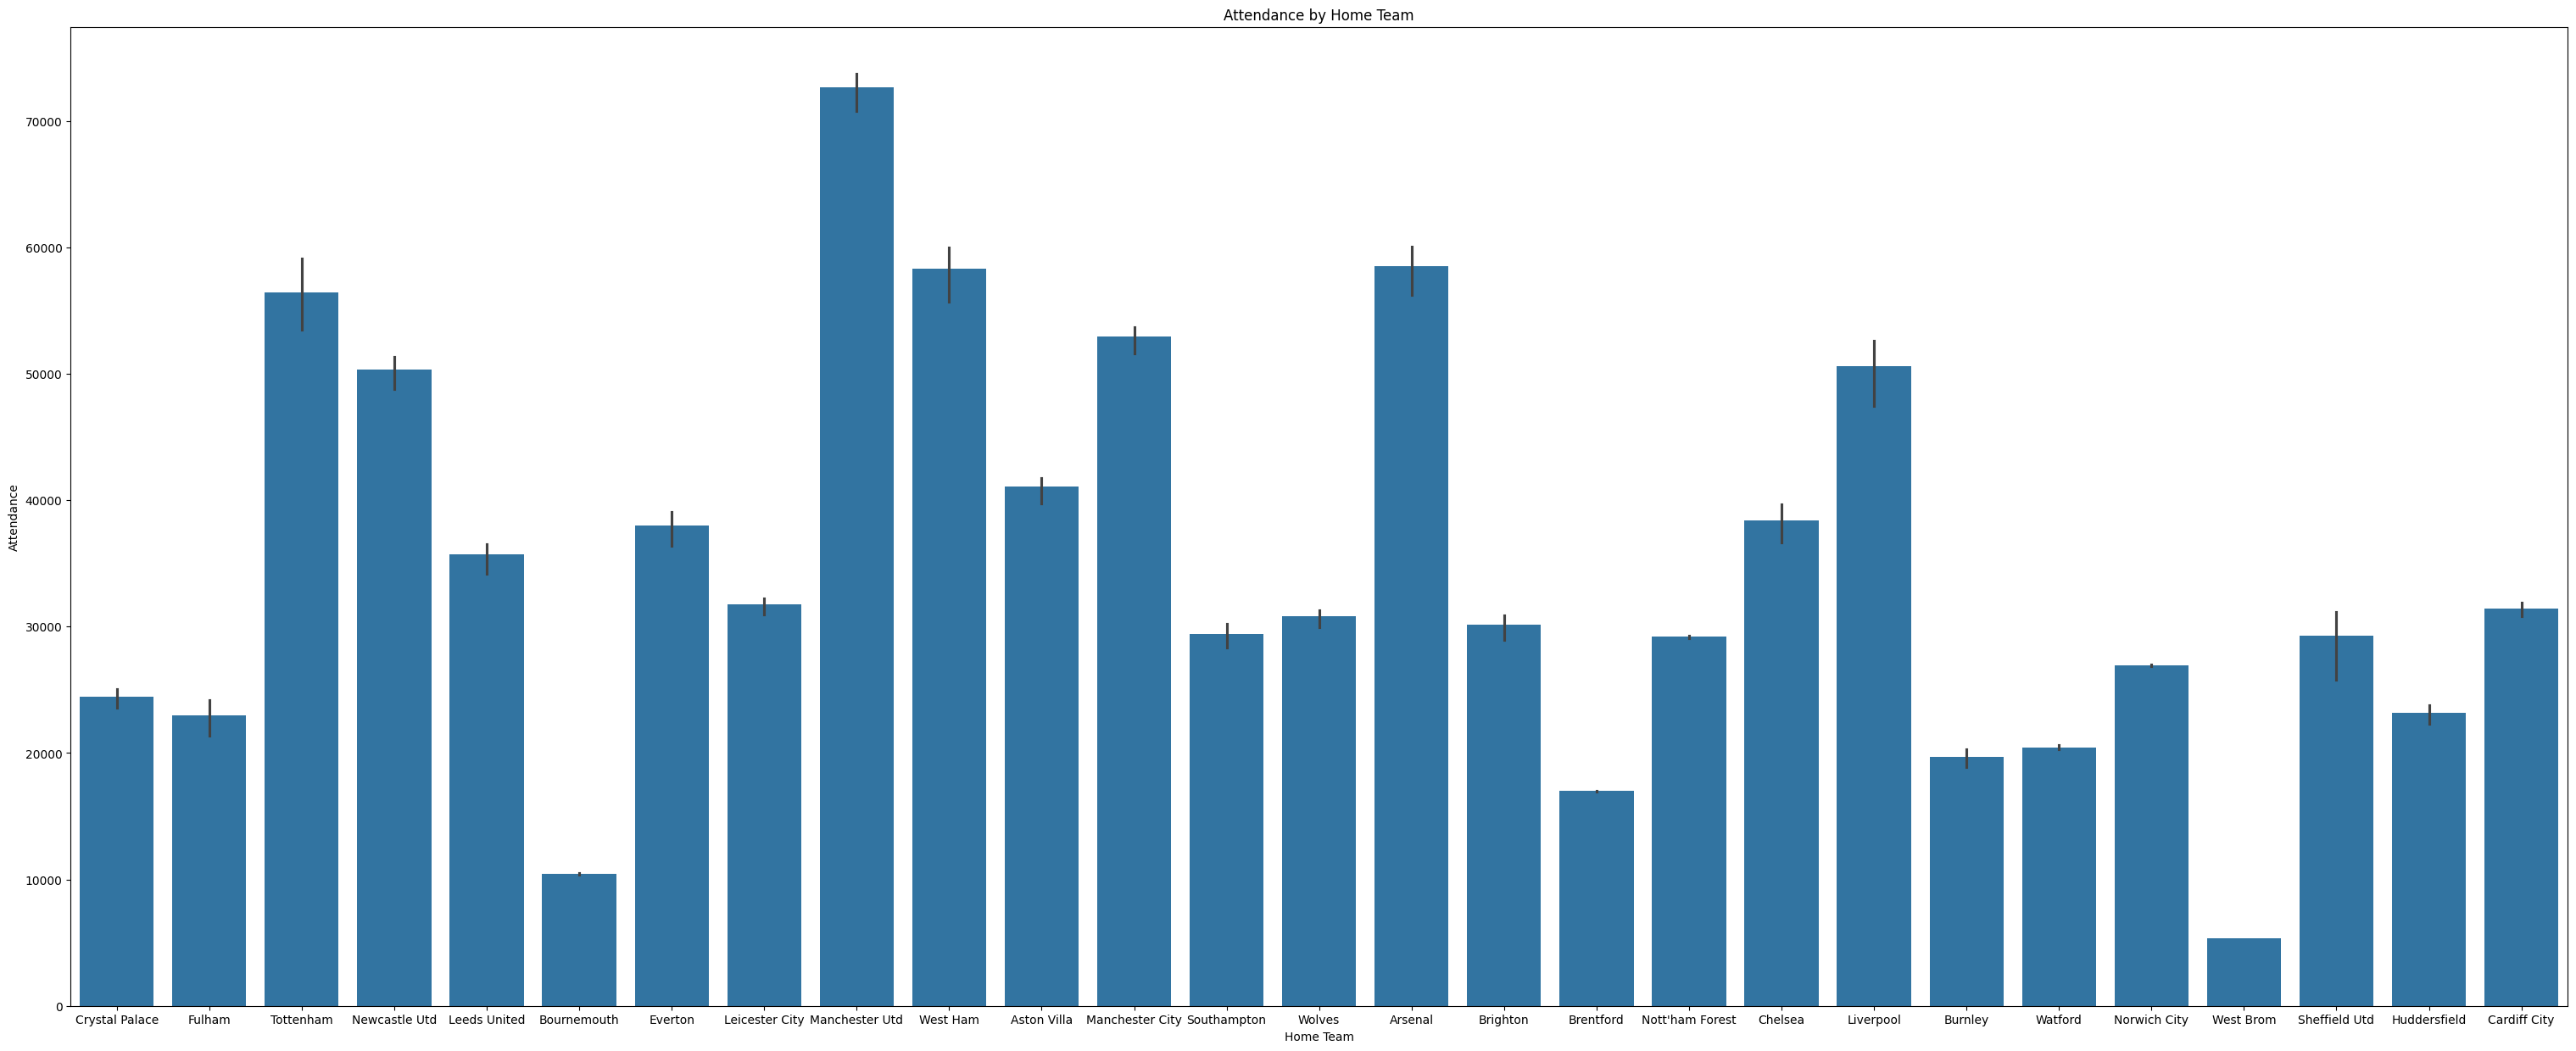

In [41]:
plt.figure(figsize=(38, 15))
sns.barplot(x='Home_Team', y='Attendance', data=df)
plt.xlabel('Home Team')
plt.ylabel('Attendance')
plt.title('Attendance by Home Team')
plt.show()

### **Machine Learning Modelling**

#### **RandomForestClassifier**

In [49]:
X = df[['Home_xG', 'Away_xG']]
y = df['Score']  # Replace 'Score' with your actual target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.09931506849315068
Classification Report:
               precision    recall  f1-score   support

         0–0       0.29      0.45      0.36        11
         0–1       0.16      0.12      0.14        25
         0–2       0.20      0.31      0.24        13
         0–3       0.00      0.00      0.00         5
         0–4       0.00      0.00      0.00         3
         0–5       1.00      0.50      0.67         2
         0–9       0.00      0.00      0.00         0
         1–0       0.12      0.10      0.11        31
         1–1       0.17      0.21      0.19        29
         1–2       0.12      0.15      0.13        20
         1–3       0.00      0.00      0.00        13
         1–4       0.00      0.00      0.00         3
         1–5       0.00      0.00      0.00         1
         1–6       0.00      0.00      0.00         0
         2–0       0.05      0.04      0.05        23
         2–1       0.07      0.07      0.07        28
         2–2       0.00    

c:\Users\crypt\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\crypt\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\crypt\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

### **HyperParameter Tuning**

The accuracy is at 9%, which is not great. Let's improve the accuracy, will implememnt hyperparamter tuning, to help the model perform better.

**Objectives:**
- Feature Engineering to capture more characteristics of the data.
- Use GridsearchCV for Param Tuning

#### Feature Engineering:

In [54]:
df['Date'] = pd.to_datetime(df['Date'])

# Extracting date features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6

# Goal Difference
df['Home_Goal'] = df['Score'].apply(lambda x: int(x.split('–')[0]))
df['Away_Goal'] = df['Score'].apply(lambda x: int(x.split('–')[1]))
df['Goal_Difference'] = df['Home_Goal'] - df['Away_Goal']

# Attendance Normalization (optional)
df['Attendance'] = (df['Attendance'] - df['Attendance'].mean()) / df['Attendance'].std()

# Additional Feature Engineering

# Last N Matches (e.g., last 5 matches)
def last_n_matches(team, n=5):
    team_matches = df[(df['Home_Team'] == team) | (df['Away_Team'] == team)]
    team_matches = team_matches.sort_values(by='Date', ascending=False)
    return team_matches.head(n)

# Average Goals Scored in Last 5 Matches for Home and Away Teams
for team in df['Home_Team'].unique():
    last_matches = last_n_matches(team)
    avg_goals_scored = last_matches['Home_Goal'].mean() if team in last_matches['Home_Team'].values else last_matches['Away_Goal'].mean()
    df.loc[df['Home_Team'] == team, 'Avg_Home_Goals'] = avg_goals_scored

for team in df['Away_Team'].unique():
    last_matches = last_n_matches(team)
    avg_goals_conceded = last_matches['Away_Goal'].mean() if team in last_matches['Away_Team'].values else last_matches['Home_Goal'].mean()
    df.loc[df['Away_Team'] == team, 'Avg_Away_Goals'] = avg_goals_conceded

# Create features for average goals scored and conceded
df['Home_Avg_Goals'] = df['Home_Goal'].rolling(window=5).mean()
df['Away_Avg_Goals'] = df['Away_Goal'].rolling(window=5).mean()

# Create a feature for match importance (example)
df['Is_Derby'] = df.apply(lambda row: 1 if (row['Home_Team'] in ['TeamA', 'TeamB'] and row['Away_Team'] in ['TeamA', 'TeamB']) else 0, axis=1)

# Create a feature for Home/Away Performance
df['Home_Performance'] = df['Home_Goal'] / df['Home_xG']
df['Away_Performance'] = df['Away_Goal'] / df['Away_xG']

# Update feature set and target variable
X = df[['Home_xG', 'Away_xG', 'Year', 'Month', 'DayOfWeek', 'Goal_Difference', 'Attendance', 
         'Avg_Home_Goals', 'Avg_Away_Goals', 'Is_Derby', 'Home_Performance', 'Away_Performance']]
y = df['Score']  # Ensure 'Score' is appropriate for classification

#### **Hyperparameter Tuning:**


In [55]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced', None]  # Adjust class weights
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best estimator
best_estimator = grid_search.best_estimator_

# Making predictions with the best estimator
y_pred = best_estimator.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy with Tuned Model: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))

c:\Users\crypt\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy with Tuned Model: 0.8835616438356164
Classification Report:
               precision    recall  f1-score   support

         0–0       1.00      1.00      1.00        11
         0–1       1.00      1.00      1.00        25
         0–2       1.00      1.00      1.00        13
         0–3       1.00      1.00      1.00         5
         0–4       1.00      1.00      1.00         3
         0–5       1.00      1.00      1.00         2
         0–6       0.00      0.00      0.00         0
         1–0       1.00      1.00      1.00        31
         1–1       0.94      1.00      0.97        29
         1–2       0.65      1.00      0.78        20
         1–3       0.77      0.77      0.77        13
         1–4       1.00      1.00      1.00         3
         1–5       1.00      1.00      1.00         1
         2–0       0.92      1.00      0.9

c:\Users\crypt\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\crypt\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\crypt\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

**Results:** We are at 88% accuracy, which is significantly better than 9%, Feature Engineering has helped improve the model.


### **Visualizing the Results:**

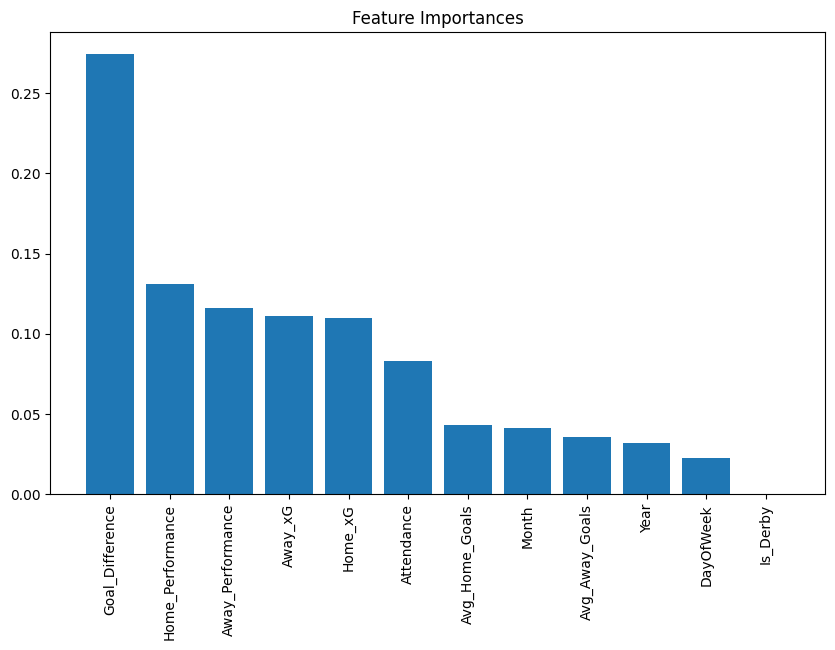

In [62]:
# Feature importance
importances = best_estimator.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

### **Conclusion:**

In this project, I aimed to predict football match outcomes using machine learning. The process involved several key steps:

1. **Data Preparation**: I started by importing necessary libraries such as Pandas, NumPy, and Scikit-learn. I then loaded the dataset and cleaned it by handling null values and removing duplicates.

2. **Exploratory Data Analysis (EDA)**: I performed EDA to understand the data better, which included visualizing distributions and relationships between features.

3. **Initial Model Training**: I implemented a Random Forest Classifier as my initial model. However, the results were disappointing, with an accuracy of only **9%**. The classification report showed poor precision and recall across most scorelines, indicating that the model was not effectively learning from the data.

4. **Feature Engineering**: To improve the model, I continued to work on feature engineering. This included creating new features based on historical performance, average goals, and other relevant metrics.

5. **Hyperparameter Tuning**: I used GridSearchCV to fine-tune the model's hyperparameters. The best parameters found were:
   - `class_weight`: 'balanced'
   - `max_depth`: 20
   - `min_samples_leaf`: 2
   - `min_samples_split`: 2
   - `n_estimators`: 200

6. **Improved Model Performance**: After fine-tuning, the model's accuracy significantly improved to **88%**. The classification report showed strong precision and recall across many scorelines, showing that the model was now effectively predicting match outcomes.

### **Summary of Results:**
- **Initial Accuracy**: 9%
- **Tuned Accuracy**: 88%
- **Key Improvements**: The model's performance improved dramatically due to better feature engineering and hyperparameter tuning.